# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

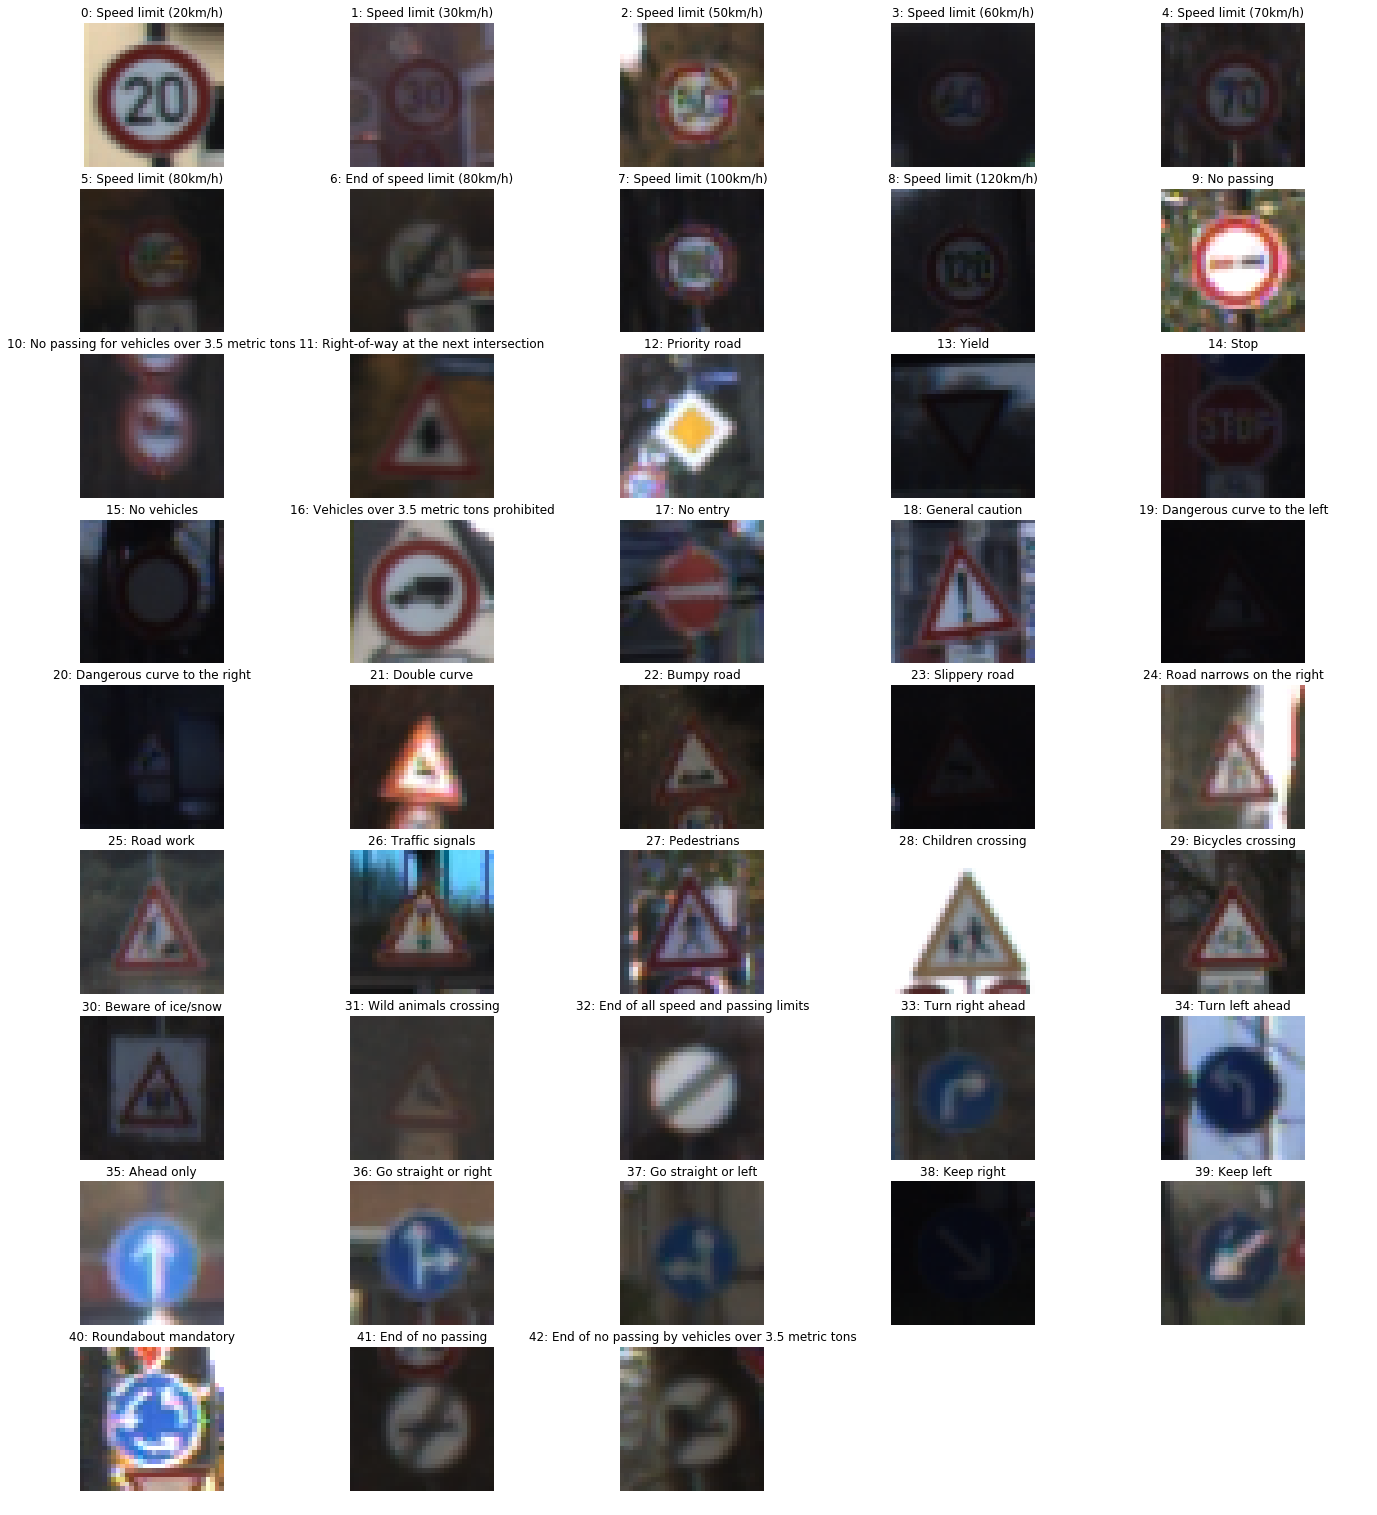

In [4]:
def visualize_images(images, correct_labels = None):
    N_COLUMNS = 5
    N_ROWS = int(len(images)/N_COLUMNS)+1
    WIDTH = 24
    HEIGHT = N_ROWS * 3
    fig, axs = plt.subplots(N_ROWS, N_COLUMNS, figsize=(WIDTH, HEIGHT))
    fig.subplots_adjust(hspace = 0.15, wspace= 0.05)
    axs = axs.ravel()
    for i in range(N_COLUMNS * N_ROWS):
        # Turn off axis
        # This is done for each subplot 
        # also the one without an image
        # (note that len(images) <= N_COLUMN * N_ROWS)
        axs[i].axis('off')
        if i < len(images):
            # Set image
            axs[i].imshow(images[i][0])

            # Set title (like 'Classification Id: Sign Name')
            label = images[i][1]
            sign_name = sign_names.loc[sign_names['ClassId'] == label, 'SignName'].values[0]
            title = str(label) + ': ' + sign_name
            
            if correct_labels is not None:
                label = correct_labels[i]
                sign_name = sign_names.loc[sign_names['ClassId'] == label, 'SignName'].values[0]
                title += '\nCorrect: ' + str(label) + ': ' + sign_name
            
            axs[i].set_title(title)
    return fig

# Read the csv file which contains the couples (Classification Id, Sign Name)
sign_names = pd.read_csv('signnames.csv')

# Get one sample image for each label in trainset
labels, indices = np.unique(y_train, return_index=True)
list_images = [(X_train[indices[i]], labels[i]) for i in range(len(labels))]
f = visualize_images(list_images)
f.savefig('images/signs.png')
n_sign = len(list_images)

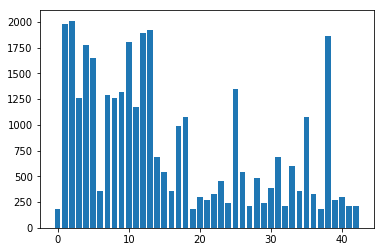

In [5]:
# Show an histogram of sign distribution
# This is done in another notebook's cell for simplicity
labels, counts = np.unique(y_train, return_counts=True)
plt.bar(labels, counts)
plt.savefig('images/distribution.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def pre_process(color_images):
    # grayscale
    grayscaled_images = np.sum(color_images/3, axis=3, keepdims=True)
    
    # normalize
    normalized_images = (grayscaled_images - 128) / 128
    
    return normalized_images

X_train = pre_process(X_train)
X_valid = pre_process(X_valid)
X_test = pre_process(X_test)

In [7]:
# Shuffle Data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Setupe TrensorFlow
import tensorflow as tf

from tensorflow.contrib.layers import flatten

# From LeNet-Lab
# LeNet with colored images
# def LeNet(x):    
#     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     mu = 0
#     sigma = 0.1
    
#     # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
#     conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
#     conv1_b = tf.Variable(tf.zeros(6))
#     conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

#     # Activation.
#     conv1 = tf.nn.relu(conv1)

#     # Pooling. Input = 28x28x6. Output = 14x14x6.
#     pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     # Layer 2: Convolutional. Output = 10x10x16.
#     conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
#     conv2_b = tf.Variable(tf.zeros(16))
#     conv2   = tf.nn.conv2d(pool1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

#     # Activation.
#     conv2 = tf.nn.relu(conv2)
    
#     # Pooling. Input = 10x10x16. Output = 5x5x16.
#     pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#     # Flatten. Input = 5x5x16. Output = 400.
#     fc0 = flatten(pool2)
    
#     # Layer 3: Fully Connected. Input = 400. Output = 120.
#     fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(120))
#     fc1 = tf.add(tf.matmul(fc0, fc1_W), fc1_b)
    
#     # Activation.
#     fc1 = tf.nn.relu(fc1)
    
#     # Layer 4: Fully Connected. Input = 120. Output = 84.
#     fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
#     fc2_b = tf.Variable(tf.zeros(84))
#     fc2 = tf.add(tf.matmul(fc1, fc2_W), fc2_b)
    
#     # Activation.
#     fc2 = tf.nn.relu(fc2)
    
#     # Layer 5: Fully Connected. Input = 84. Output = 43.
#     fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
#     fc3_b = tf.Variable(tf.zeros(43))
#     logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    
#     return logits

In [9]:
# LeNet with grayscale images (no dropout)
# def LeNet(x):    
#     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     mu = 0
#     sigma = 0.1
    
#     # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
#     conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
#     conv1_b = tf.Variable(tf.zeros(6))
#     conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

#     # Activation.
#     conv1 = tf.nn.relu(conv1)

#     # Pooling. Input = 28x28x6. Output = 14x14x6.
#     pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     # Layer 2: Convolutional. Output = 10x10x16.
#     conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
#     conv2_b = tf.Variable(tf.zeros(16))
#     conv2   = tf.nn.conv2d(pool1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

#     # Activation.
#     conv2 = tf.nn.relu(conv2)
    
#     # Pooling. Input = 10x10x16. Output = 5x5x16.
#     pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#     # Flatten. Input = 5x5x16. Output = 400.
#     fc0 = flatten(pool2)
    
#     # Layer 3: Fully Connected. Input = 400. Output = 120.
#     fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(120))
#     fc1 = tf.add(tf.matmul(fc0, fc1_W), fc1_b)
    
#     # Activation.
#     fc1 = tf.nn.relu(fc1)
    
#     # Layer 4: Fully Connected. Input = 120. Output = 84.
#     fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
#     fc2_b = tf.Variable(tf.zeros(84))
#     fc2 = tf.add(tf.matmul(fc1, fc2_W), fc2_b)
    
#     # Activation.
#     fc2 = tf.nn.relu(fc2)
    
#     # Layer 5: Fully Connected. Input = 84. Output = 43.
#     fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
#     fc3_b = tf.Variable(tf.zeros(43))
#     logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    
#     return logits

In [10]:
# LeNet with grayscale images (with dropout)
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)

    # Layer 1: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)

    # Layer 2: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    fc0   = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Layer 3: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob) 


    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Layer 4: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob) 

    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))


    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [11]:
# Use this if colored images are used
# x = tf.placeholder(tf.float32, (None, 32, 32, 3))

# Use this if grayscale images are used
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_sign)
keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Training Accuracy = 0.386
Validation Accuracy = 0.322

EPOCH 2 ...
Training Accuracy = 0.597
Validation Accuracy = 0.533

EPOCH 3 ...
Training Accuracy = 0.702
Validation Accuracy = 0.642

EPOCH 4 ...
Training Accuracy = 0.767
Validation Accuracy = 0.698

EPOCH 5 ...
Training Accuracy = 0.821
Validation Accuracy = 0.760

EPOCH 6 ...
Training Accuracy = 0.850
Validation Accuracy = 0.796

EPOCH 7 ...
Training Accuracy = 0.867
Validation Accuracy = 0.807

EPOCH 8 ...
Training Accuracy = 0.881
Validation Accuracy = 0.817

EPOCH 9 ...
Training Accuracy = 0.892
Validation Accuracy = 0.834

EPOCH 10 ...
Training Accuracy = 0.901
Validation Accuracy = 0.849

EPOCH 11 ...
Training Accuracy = 0.916
Validation Accuracy = 0.857

EPOCH 12 ...
Training Accuracy = 0.914
Validation Accuracy = 0.856

EPOCH 13 ...
Training Accuracy = 0.922
Validation Accuracy = 0.864

EPOCH 14 ...
Training Accuracy = 0.925
Validation Accuracy = 0.868

EPOCH 15 ...
Training Accuracy = 0.934
Valid

EPOCH 122 ...
Training Accuracy = 0.994
Validation Accuracy = 0.964

EPOCH 123 ...
Training Accuracy = 0.994
Validation Accuracy = 0.968

EPOCH 124 ...
Training Accuracy = 0.993
Validation Accuracy = 0.961

EPOCH 125 ...
Training Accuracy = 0.994
Validation Accuracy = 0.967

EPOCH 126 ...
Training Accuracy = 0.994
Validation Accuracy = 0.965

EPOCH 127 ...
Training Accuracy = 0.994
Validation Accuracy = 0.963

EPOCH 128 ...
Training Accuracy = 0.995
Validation Accuracy = 0.965

EPOCH 129 ...
Training Accuracy = 0.994
Validation Accuracy = 0.963

EPOCH 130 ...
Training Accuracy = 0.995
Validation Accuracy = 0.963

EPOCH 131 ...
Training Accuracy = 0.994
Validation Accuracy = 0.967

EPOCH 132 ...
Training Accuracy = 0.994
Validation Accuracy = 0.965

EPOCH 133 ...
Training Accuracy = 0.994
Validation Accuracy = 0.966

EPOCH 134 ...
Training Accuracy = 0.994
Validation Accuracy = 0.969

EPOCH 135 ...
Training Accuracy = 0.994
Validation Accuracy = 0.968

EPOCH 136 ...
Training Accuracy = 

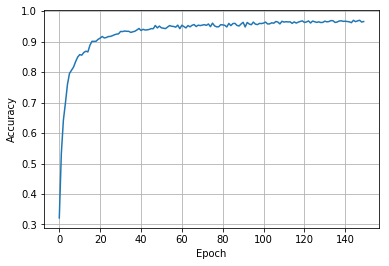

In [13]:
EPOCHS = 150
BATCH_SIZE = 128
rate = 0.0006

DROPOUT = 0.5

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    accuracies = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        
        accuracies.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, './lenet')
    print("Model saved")
    
    plt.plot(range(0,EPOCHS),accuracies)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.grid(True) 
    plt.show()

In [19]:
# Get Accuracy last model trained

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    training_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    validation_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Training Accuracy = 0.995
Validation Accuracy = 0.966
Test Accuracy = 0.951


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

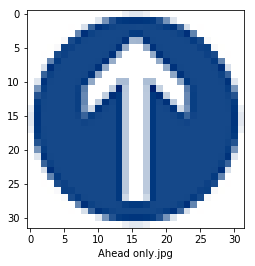

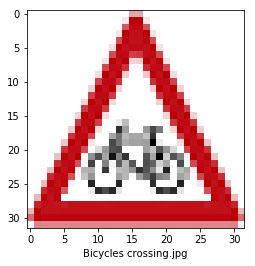

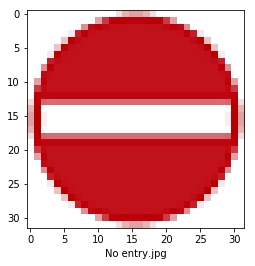

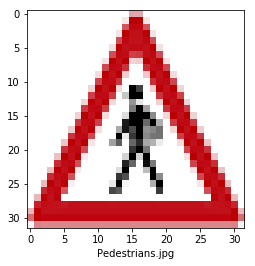

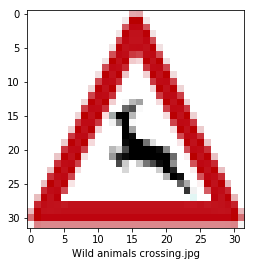

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

my_images = []
my_labels = []
myFolder = 'myTrafficSigns'
signnames = pd.read_csv('signnames.csv')
# I'm assuming that the name of the image is the same 
# as the traffic sign it represents
for i, img in enumerate(os.listdir(myFolder)):
    # Load the image
    image = np.array(mpimg.imread(myFolder + '/' + img))
    my_images.append(image)
    
    # Plot the image
    plt.figure()
    plt.xlabel(img)
    plt.imshow(image)
    
    # Get the label
    sign_name = img.split('.')[0] # Remove file extension
    label = signnames[signnames['SignName'] == sign_name]['ClassId'].values[0]
    my_labels.append(label)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet


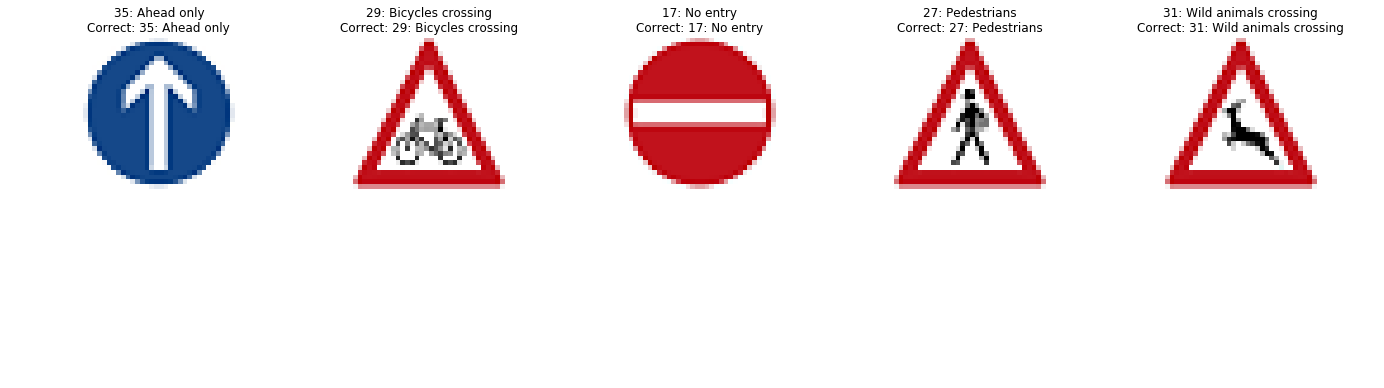

In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Use this for colored images
# my_images = np.asarray(my_images)

# Use this for grayscale images
my_images_preprocessed = pre_process(np.asarray(my_images))

prediction=tf.argmax(logits,1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Use this for colored images
    # predictions = sess.run(prediction, feed_dict={x: my_images})
    # Use this for grayscale images
    predictions = sess.run(prediction, feed_dict={x: my_images_preprocessed, keep_prob: 1.0})
    list_images = [(my_images[i], my_labels[i]) for i in range(len(my_images))]
    visualize_images(list_images, predictions)

### Analyze Performance

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Use this for colored images
    # output_accuracy = evaluate(my_images, my_labels)
    # Use this for colored images
    output_accuracy = evaluate(my_images_preprocessed, my_labels)
    print("Test Accuracy = {:.3f}".format(output_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet
done


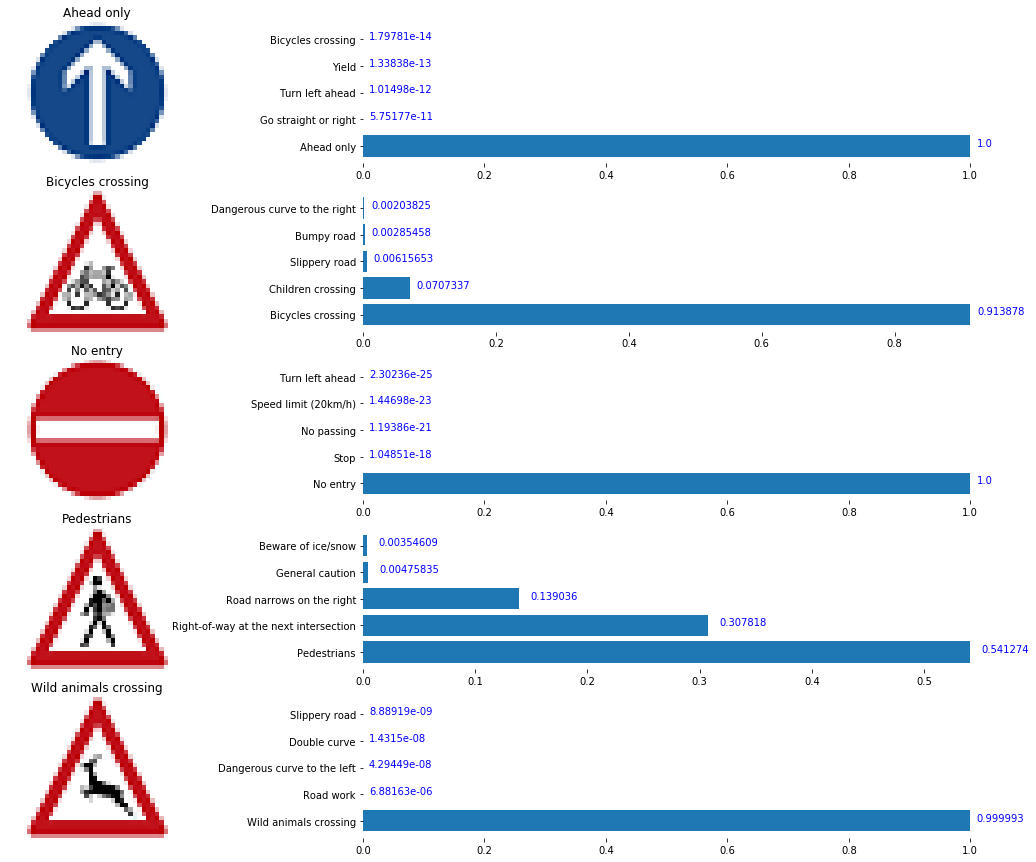

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def display_top_softmax(test_images, test_labels, top_k):
    probabilities = top_k.values
    indices = top_k.indices
          
    signnames = pd.read_csv('signnames.csv')
    
    N_COLUMNS = 2
    N_ROWS = len(indices)
    WIDTH = 20
    HEIGHT = N_ROWS * 3
    fig, axs = plt.subplots(N_ROWS, N_COLUMNS, figsize=(WIDTH, HEIGHT), gridspec_kw={'width_ratios': [1, 1.5]})
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
    i = 0
    for row in range(N_ROWS):
        axs[i].axis('off')
        axs[i].imshow(test_images[row])
        sign_name = signnames[signnames['ClassId'] == test_labels[row]]['SignName'].values[0]
        axs[i].set_title(sign_name)
        i += 1
        axs[i].set_frame_on(False)
        labels = [signnames[signnames['ClassId'] == j]['SignName'].values[0] for j in indices[row]]
        y_pos = range(len(indices[row]))
        for j, v in enumerate(probabilities[row]):
            axs[i].text(v + 0.01, j, str(v), color='blue')
        axs[i].barh(y_pos, probabilities[row], tick_label=labels, linewidth  = 0)
        i += 1

softmax_logits = tf.nn.softmax(logits)
top_k=tf.nn.top_k(softmax_logits,5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k = sess.run(top_k, feed_dict={x: my_images_preprocessed, keep_prob : 1.0})
    display_top_softmax(my_images, my_labels, top_k)
    
print('done')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.